In [1]:
import numpy as np
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout, Dense, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from visualkeras import layered_view
import json
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [2]:
ytrain = np.load('ytrain.npy')
ytest = np.load('ytest.npy')
xtrain = np.load('xtrain.npy')
xtest = np.load('xtest.npy')

In [3]:
# Image size
image_size = (150, 150)

# Training batch size
batch_size = 32
SEED = 111
image_shape = (image_size[0], image_size[1], 3)
epochs = 32
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

In [4]:
# set CNN model with 5 convolutional layers at 3x3 kernel, relu as activation function for each convolutional layer and 
#max pooling, followed by 3 Dense laye with a drop out rate at 30% and a last dense layer with 4 number of classifications
model_woBN = Sequential([
    Conv2D(32, (3, 3),  input_shape = image_shape,name= 'conv1'),  
    Activation('relu', name='relu1'),
    MaxPooling2D(pool_size=(2, 2),strides=(2,2),name= 'max1'),

    Conv2D(64, (3, 3),name='con2'),
    Activation('relu',name= 'relu2'),
    MaxPooling2D(pool_size=(2, 2),strides=(2,2),name='max2'),

    Conv2D(128, (3, 3),name='conv3'),
    Activation('relu',name='relu3'),
    MaxPooling2D(pool_size=(2, 2),strides=(2,2), name='max3'),
    
    Conv2D(128, (3, 3),name='conv4'),
    Activation('relu',name='relu4'),
    MaxPooling2D(pool_size=(2, 2),strides=(2,2), name='max4'),
    
    Conv2D(256, (3, 3),name='conv5'),
    Activation('relu',name='relu5'),
    MaxPooling2D(pool_size=(2, 2),strides=(2,2), name='max5'),
    
    Flatten(name='flatten'),
    Dense(256, activation='relu',name='dense1'),
    Dropout(0.3,name='drop1'),
    Dense(256, activation='relu', name='dense2'),
    Dropout(0.3,name='drop2'),
    Dense(128, activation='relu',name='dense4'),
    Dropout(0.3, name='drop3'),

    Dense(4, activation='softmax', name='softmax')  
])

model_woBN.summary()

/Users/user/IUBH/Semester5/neuralnets/nnenv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu1 (Activation)              │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max1 (MaxPooling2D)             │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ con2 (Conv2D)                   │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu2 (Activation)              │ (None, 72, 72, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max2 (MaxPooling2D)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu3 (Activation)              │ (None, 34, 34, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max3 (MaxPooling2D)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu4 (Activation)              │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max4 (MaxPooling2D)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv5 (Conv2D)                  │ (None, 5, 5, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu5 (Activation)              │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max5 (MaxPooling2D)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense4 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 897,604 (3.42 MB)

 Trainable params: 897,604 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# compile model using ADAm optimizer and categorical coressentropy for loss function, and evaluation metrics
model_woBN.compile(
    optimizer= Adam(),
    loss='categorical_crossentropy',       
    metrics=['accuracy', 'precision', 'recall', 'auc']
)

/Users/user/IUBH/Semester5/neuralnets/nnenv/lib/python3.12/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


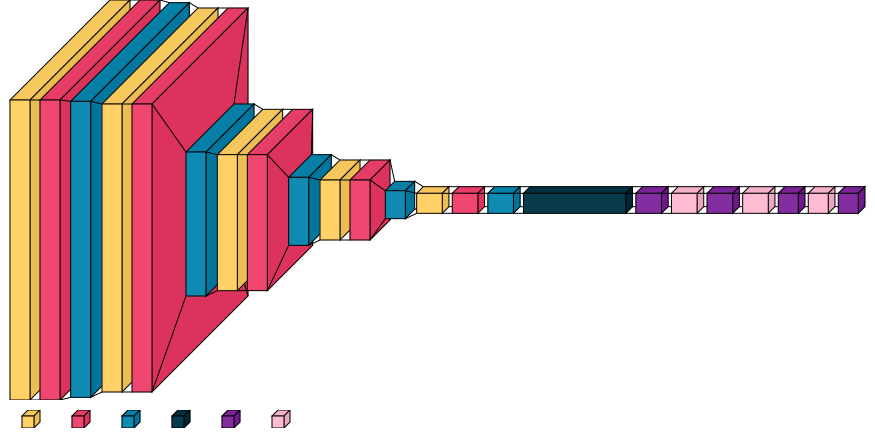

In [6]:
layered_view(model_woBN, legend=True, max_xy=300)

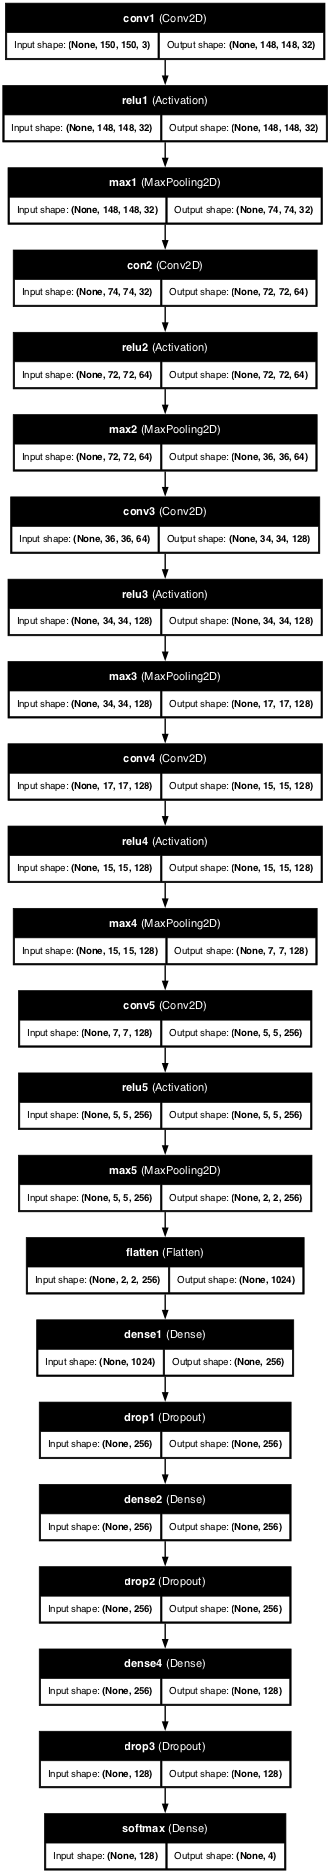

In [7]:
plot_model(model_woBN, to_file="cnn_plot.png", show_shapes=True, show_layer_names=True, dpi= 50)


In [8]:
#fit model using 15% of training subset for validation, having 32 epochs 
hist_woBN= model_woBN.fit(
    xtrain,ytrain,               
    epochs=epochs,              
    validation_split= 0.15,
    batch_size= 64, 
    callbacks= reduce_lr
    
)

Epoch 1/32
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 395ms/step - accuracy: 0.3155 - auc: 0.5764 - loss: 2.7133 - precision: 0.3621 - recall: 0.1174 - val_accuracy: 0.6726 - val_auc: 0.8936 - val_loss: 0.8089 - val_precision: 0.8078 - val_recall: 0.4935 - learning_rate: 0.0010
Epoch 2/32
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 404ms/step - accuracy: 0.6388 - auc: 0.8725 - loss: 0.8562 - precision: 0.7214 - recall: 0.4870 - val_accuracy: 0.7829 - val_auc: 0.9424 - val_loss: 0.5826 - val_precision: 0.8235 - val_recall: 0.6975 - learning_rate: 0.0010
Epoch 3/32
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 415ms/step - accuracy: 0.7228 - auc: 0.9292 - loss: 0.6349 - precision: 0.7769 - recall: 0.6545 - val_accuracy: 0.8126 - val_auc: 0.9607 - val_loss: 0.4851 - val_precision: 0.8499 - val_recall: 0.7521 - learning_rate: 0.0010
Epoch 4/32
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 424ms/step - accuracy: 0.8096 - auc: 0.9571 - loss: 0.4982 - precision: 0.8354 - recall: 0.7655 - val_accuracy: 0.8529 - val_auc: 0.9699 - val_loss: 0.4140 -

In [9]:
#save results from model history
history_dict = hist_woBN.history
with open('model_woBN_history.json', 'w') as f:
    json.dump(history_dict, f)

In [10]:
#Plot results from history
def plot_history(History):
    for key in History.history:
        if not key.startswith('val_'):  
            val_key = f"val_{key}" 
            
            plt.plot(History.history[key], label=f"Training {key}")
            
            if val_key in History.history:  
                plt.plot(History.history[val_key], label=f"Validation {key}")
            
            
            plt.title(f"Training and Validation {key}")
            plt.xlabel('Epochs')
            plt.ylabel(key.capitalize())
            plt.legend()
            plt.show()


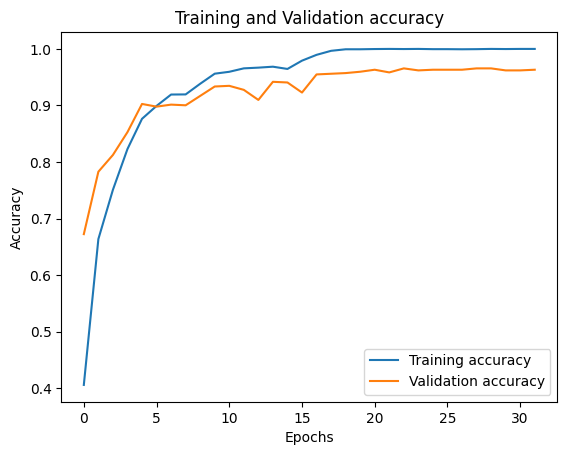

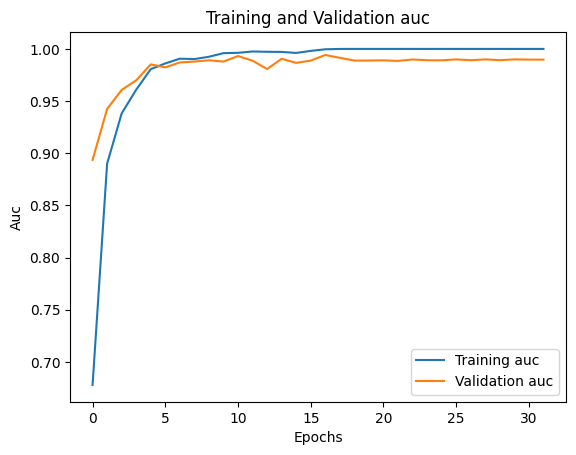

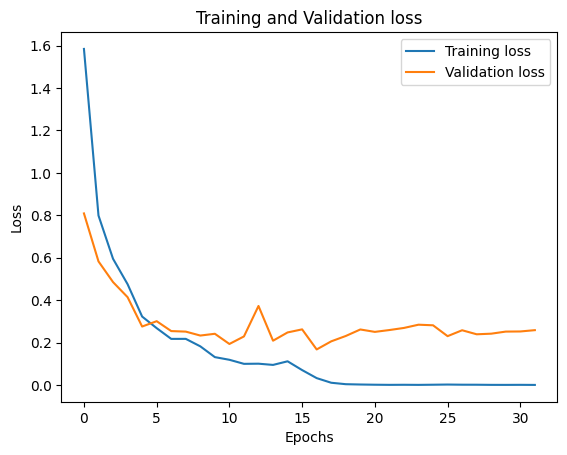

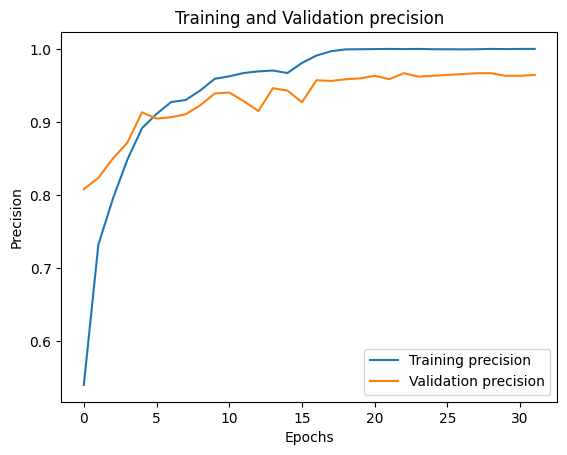

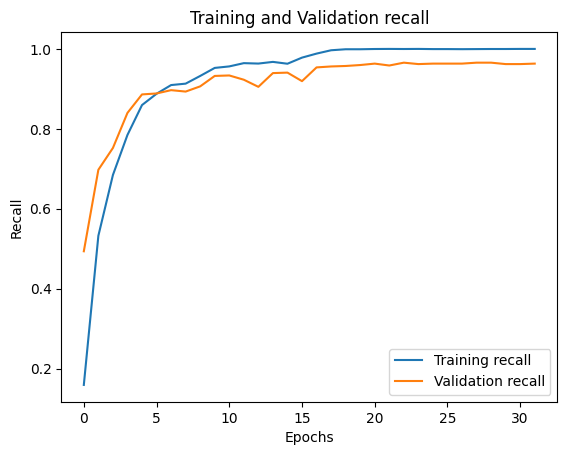

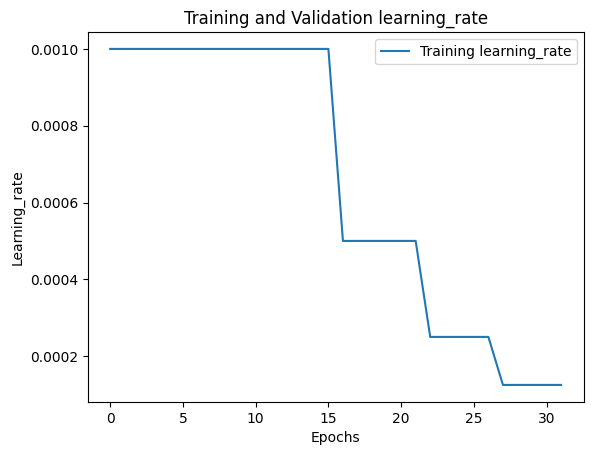

In [11]:
plot_history(hist_woBN)

In [12]:
# Evaluate on test data
test_loss, test_accuracy, test_precision, test_recall, test_auc = model_woBN.evaluate(xtest, ytest, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.2962
Test Accuracy: 0.9630


In [13]:
#calculate probability outcomes
y_pred_prob = model_woBN.predict(xtest) 
#encode probability
y_pred = np.argmax(y_pred_prob, axis=1)
y_pred
#align ytest to y_pred format
ytest_labels = np.argmax(ytest, axis = 1)
ytest_labels

44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step


array([0, 0, 0, ..., 0, 3, 1])

Classification Report:
              precision    recall  f1-score   support

      glioma       0.96      0.95      0.95       327
     notumor       0.92      0.93      0.93       304
  meningioma       0.99      0.98      0.99       428
   pituitary       0.97      0.98      0.98       346

    accuracy                           0.96      1405
   macro avg       0.96      0.96      0.96      1405
weighted avg       0.96      0.96      0.96      1405



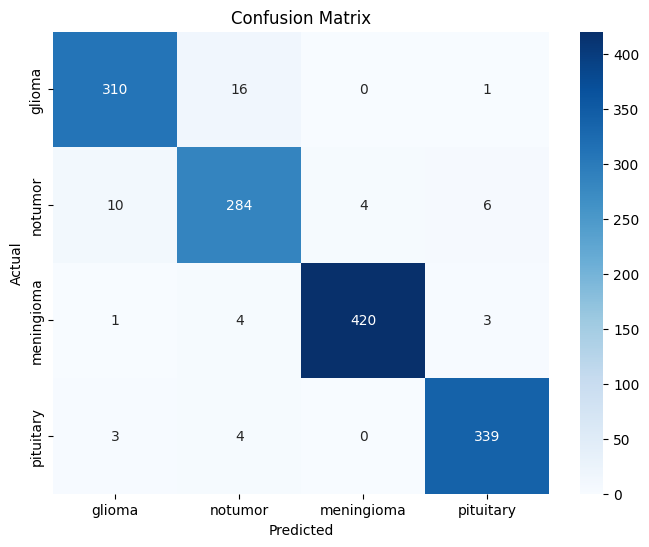

In [14]:
# Classification report
labels = ['glioma','notumor','meningioma','pituitary']
print("Classification Report:")
print(classification_report(ytest_labels, y_pred, target_names=labels))

# Confusion matrix
import seaborn as sns

conf_matrix = confusion_matrix(ytest_labels, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [15]:
# Save as JSON

cm_dict = conf_matrix.tolist()  # Convert NumPy array to a list
with open('cm_model_woBN.json', 'w') as f:
    json.dump(cm_dict, f)

## check robustness with noisy data

In [16]:
#add Gaussian noise with a zero mean, and standard deviation of 1, meaning noise values are spread within one unit variance
def add_noise(images, noise_level= 0.1):
    noisy_images = images + noise_level * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    return np.clip(noisy_images, 0.0, 1.0)

x_test_noisy = add_noise(xtest)
x_train_noisy = add_noise(xtrain)

In [17]:
#combine clean and noisy data
xtrain_combined = np.concatenate([xtrain, x_train_noisy], axis=0)
ytrain_combined = np.concatenate([ytrain, ytrain], axis=0)  # Duplicate labels
xtest_combined = np.concatenate([xtest, x_test_noisy], axis= 0)
ytest_combined = np.concatenate([ytest, ytest], axis=0)



In [18]:
# train model on training data added with noisy data
noisy_hist = model_woBN.fit(
    xtrain_combined,
    ytrain_combined,
    epochs=epochs,              
    validation_split= 0.15,
    batch_size= 64, 
    callbacks= reduce_lr
    
)

Epoch 1/32
150/150 ━━━━━━━━━━━━━━━━━━━━ 68s 448ms/step - accuracy: 0.8080 - auc: 0.9581 - loss: 0.4991 - precision: 0.9472 - recall: 0.7234 - val_accuracy: 0.5884 - val_auc: 0.8418 - val_loss: 0.9433 - val_precision: 0.8280 - val_recall: 0.3826 - learning_rate: 6.2500e-05
Epoch 2/32
150/150 ━━━━━━━━━━━━━━━━━━━━ 66s 440ms/step - accuracy: 0.8309 - auc: 0.9722 - loss: 0.3916 - precision: 0.9556 - recall: 0.7461 - val_accuracy: 0.6097 - val_auc: 0.8491 - val_loss: 0.9208 - val_precision: 0.8562 - val_recall: 0.3707 - learning_rate: 6.2500e-05
Epoch 3/32
150/150 ━━━━━━━━━━━━━━━━━━━━ 65s 433ms/step - accuracy: 0.8259 - auc: 0.9710 - loss: 0.3970 - precision: 0.9586 - recall: 0.7440 - val_accuracy: 0.5973 - val_auc: 0.8514 - val_loss: 0.9023 - val_precision: 0.8500 - val_recall: 0.3832 - learning_rate: 6.2500e-05
Epoch 4/32
150/150 ━━━━━━━━━━━━━━━━━━━━ 66s 439ms/step - accuracy: 0.8395 - auc: 0.9749 - loss: 0.3712 - precision: 0.9621 - recall: 0.7599 - val_accuracy: 0.6174 - val_auc: 0.8565 

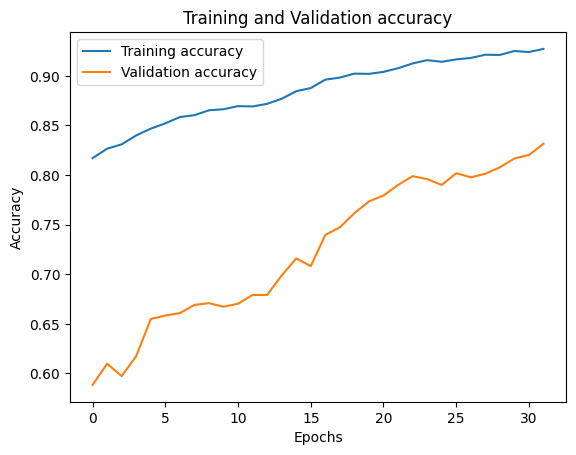

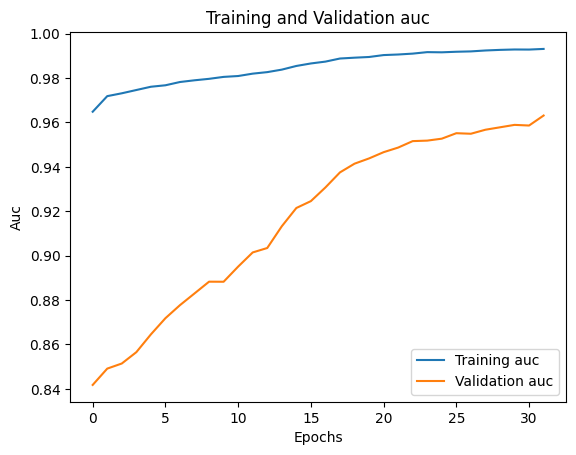

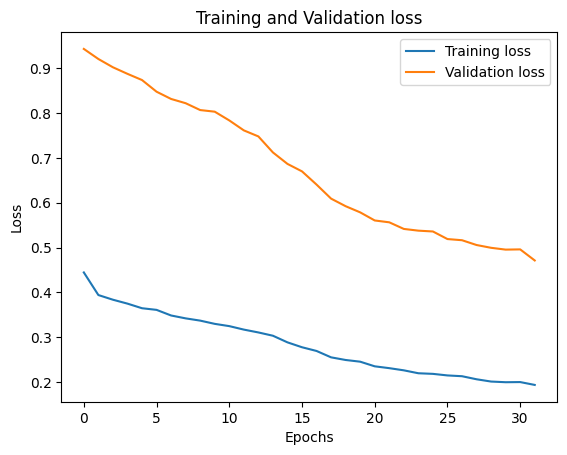

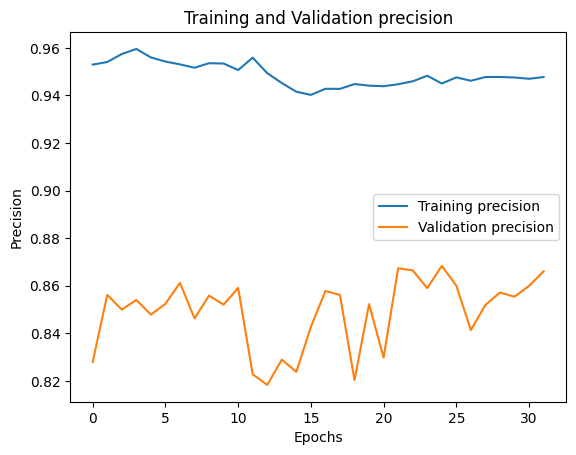

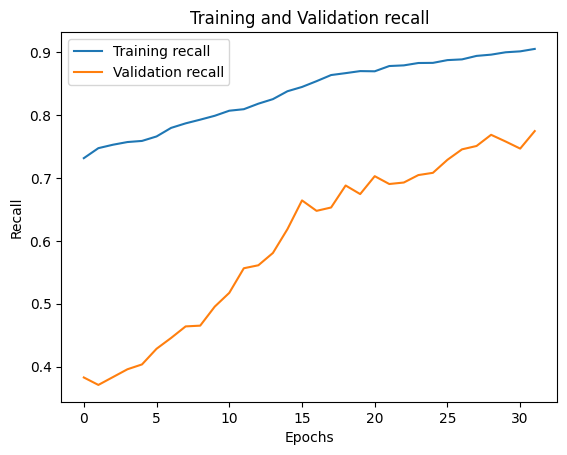

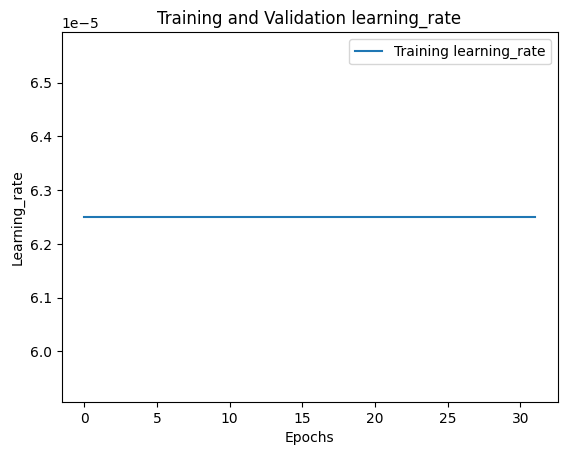

In [19]:
# plot history of noisy data
plot_history(noisy_hist)

In [20]:
# Evaluate on test data
test__noise_loss, test_noise_accuracy, test_noise_precision, test_noise_recall, test_noise_auc = model_woBN.evaluate(xtest_combined, ytest_combined, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.2962
Test Accuracy: 0.9630


In [21]:
#calculate probability outcomes
y_pred_prob_noisy = model_woBN.predict(x_test_noisy) 

44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step


In [22]:
y_pred_noisy = np.argmax(y_pred_prob_noisy, axis=1)
ytest_labels_noisy = np.argmax(ytest, axis = 1)

Classification Report:
              precision    recall  f1-score   support

      glioma       0.85      0.87      0.86       327
     notumor       0.73      0.64      0.68       304
  meningioma       0.91      0.95      0.93       428
   pituitary       0.80      0.83      0.81       346

    accuracy                           0.83      1405
   macro avg       0.82      0.82      0.82      1405
weighted avg       0.83      0.83      0.83      1405



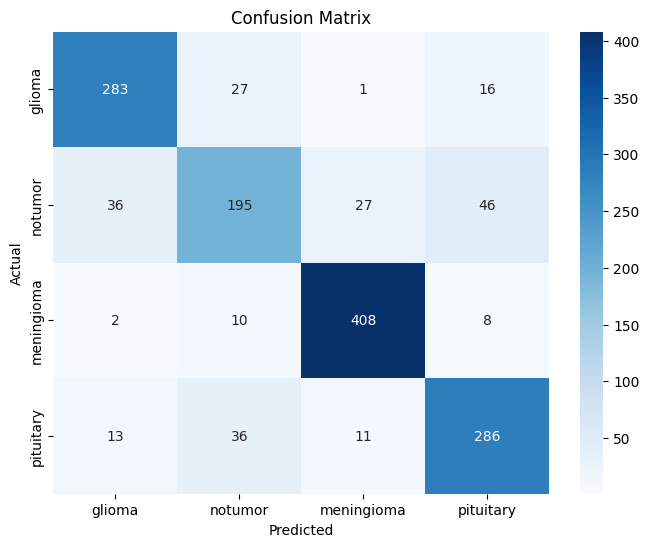

In [23]:
# Classification report
labels = ['glioma','notumor','meningioma','pituitary']
print("Classification Report:")
print(classification_report(ytest_labels_noisy, y_pred_noisy, target_names=labels))

# Confusion matrix
import seaborn as sns

conf_matrix = confusion_matrix(ytest_labels_noisy, y_pred_noisy)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
